# COVID-19 Data Analysis & Visualization Project

**Author:** Joseph Mshana  
**Module:** Python – Week 8 Final Project  
**Dataset Source:** Our World in Data (https://ourworldindata.org/covid-deaths)

## Objective

This project analyzes COVID-19 data from a global dataset to explore trends in infections, deaths, and vaccination progress for selected countries. The analysis includes data cleaning, statistical exploration, and visualizations to uncover key insights.

## Tools & Libraries

- pandas  
- matplotlib  
- seaborn  
- (optional) plotly


## 1. Setup & Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview the first few rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


## 2. Data Cleaning & Preparation

In [2]:
# Check available countries
available_countries = df['location'].unique()
print("Sample available countries:", available_countries[:10])

# Select countries of interest
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()

# Convert 'date' to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Drop rows with missing critical values
df_countries.dropna(subset=['total_cases', 'total_deaths', 'new_cases', 'new_deaths'], inplace=True)

# Fill missing vaccination data with forward fill
df_countries['total_vaccinations'] = df_countries.groupby('location')['total_vaccinations'].fillna(method='ffill')


Sample available countries: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina']


## 3. Exploratory Data Analysis (EDA)

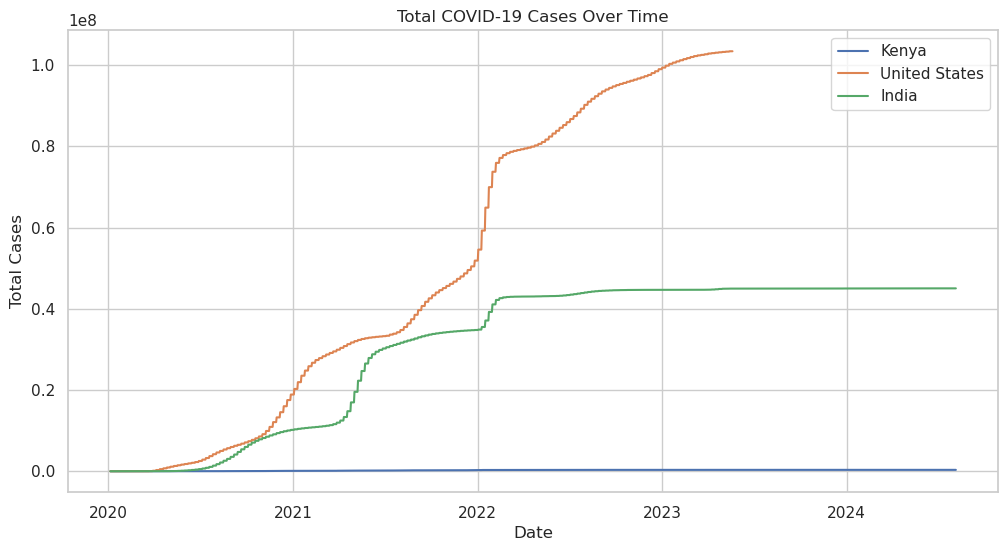

In [3]:
# Set style
sns.set(style="whitegrid")

# Total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


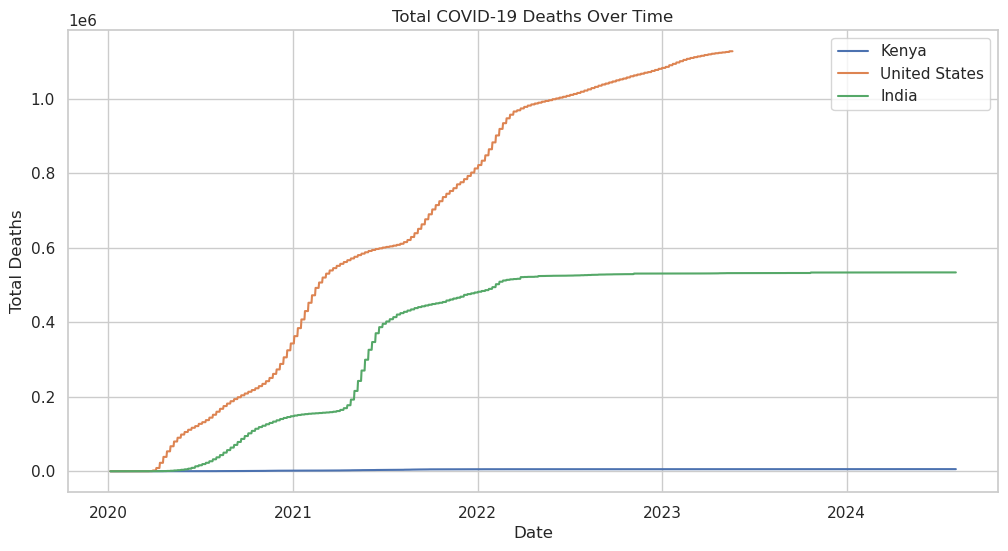

In [4]:
# Total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


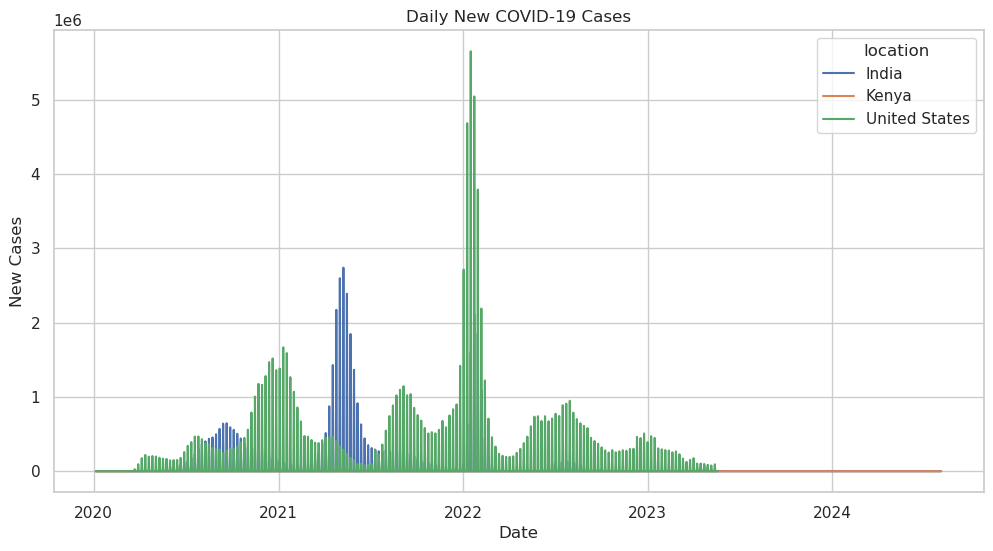

In [5]:
# Daily new cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='date', y='new_cases', hue='location')
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


## 4. Death Rate Calculation

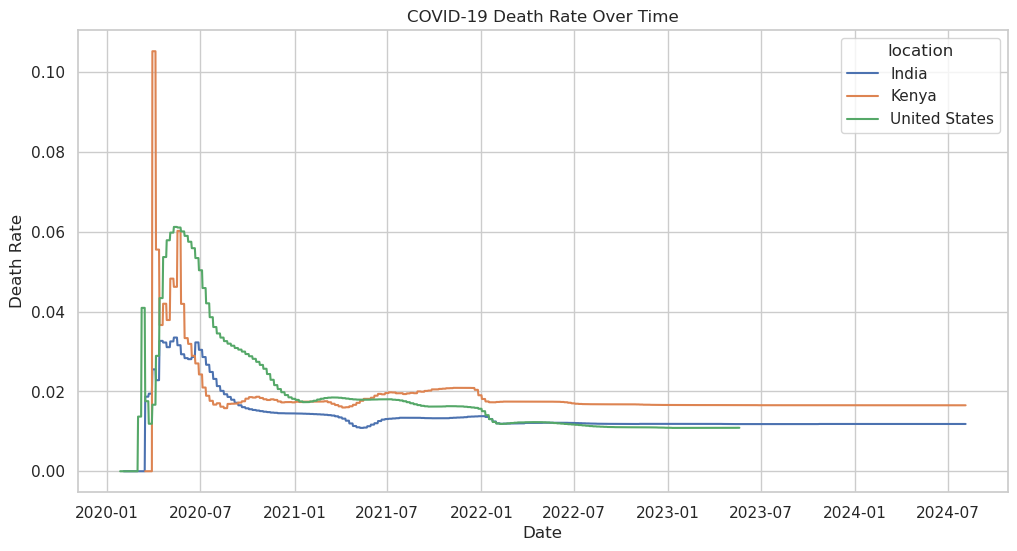

In [6]:
# Create death rate column
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

# Plot death rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.show()


## 5. Vaccination Progress

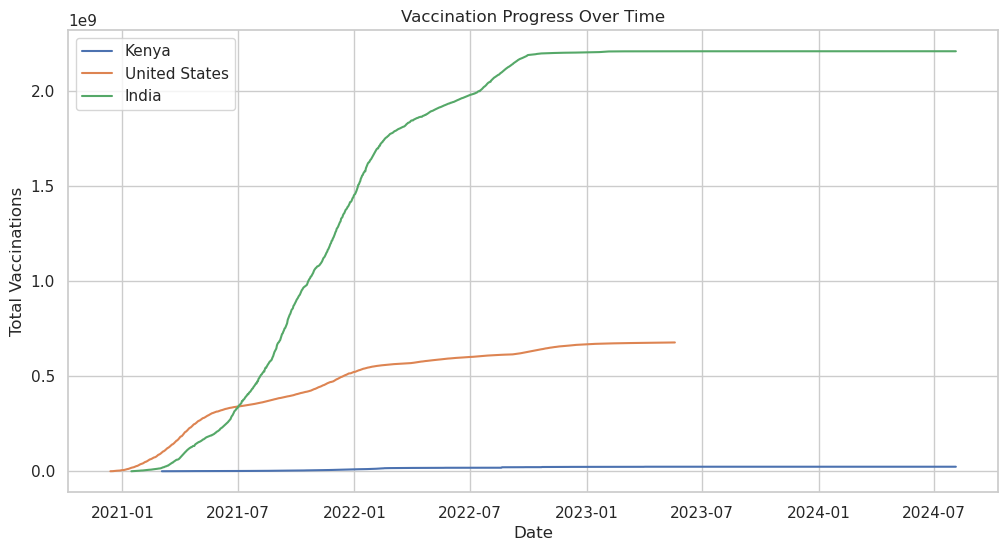

In [7]:
# Plot vaccination progress
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


## 6. Choropleth Map (Global Snapshot - Latest Date)

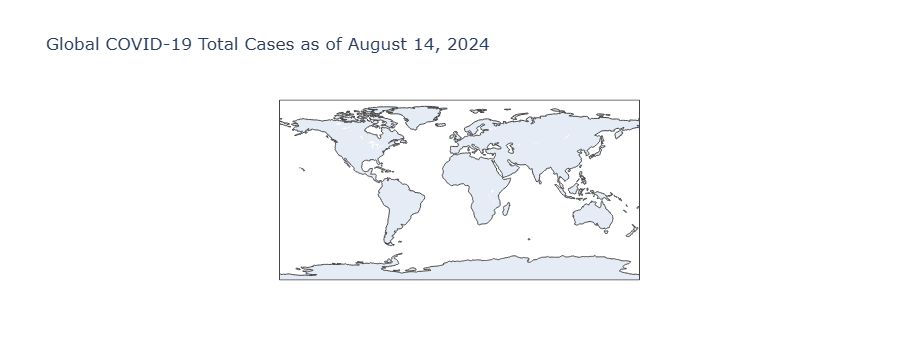

In [9]:
import plotly.express as px

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Get the latest date in the dataset
latest_date = df['date'].max()

# Filter for latest date and valid total_cases with ISO codes
latest_df = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']].copy()

# Convert total_cases to numeric (in case of string type)
latest_df['total_cases'] = pd.to_numeric(latest_df['total_cases'], errors='coerce')

# Drop rows with missing or zero values
latest_df = latest_df.dropna(subset=['iso_code', 'total_cases'])
latest_df = latest_df[latest_df['total_cases'] > 0]

# Generate the choropleth map
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    title=f"Global COVID-19 Total Cases as of {latest_date.strftime('%B %d, %Y')}",
    color_continuous_scale="Reds"
)

# Display the map
fig.show()


## 7. Summary Insights

1. The United States had the highest number of cases among the selected countries throughout the pandemic.
2. India experienced a massive spike in new cases during mid-2021 (Delta wave).
3. Kenya showed a relatively lower total case count but also lower vaccination coverage.
4. The death rate remained relatively stable in the U.S. and India, while Kenya’s showed more variability.
5. Vaccination rollout was fastest in the United States, with India following and Kenya lagging bind.




## Conclusion

This analysis provided a data-driven overview of COVID-19's impact on three countries: Kenya, the United States, and India. By exploring trends in cases, deaths, and vaccination rates, we gain insight into how different nations experienced and responded to the pandemic. These visualizations and insights can support further public health discussions and planning.

